# Module 03: Exploratory Data Analysis (EDA)

<details><summary><h2>- Learning Objectives:</h2></summary>

- Descriptive Statistics.
- Basic of Grouping. (GroupBy)
- ANOVA.
- Correlation.
- Correlation - Statistics.
</details>

<details><summary><h3>- Preliminary step in data analysis to:</h3></summary>

- Summarize main characteristics of the data.
- Gain better understanding of the data set.
- Uncover relationships between variables.
- Extract important variables.

</details>

- **Question:**

    + **What're the characteristics that have the most impact on the car price?**

In [ ]:
## Required Libraries to be installed:
!pip3 install seaborn
# !conda install seaborn
!pip3 install scipy
# !conda install scipy

In [4]:
# Importing the dataset we're working on.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

path = 'clean_df.csv'
df = pd.read_csv(path)
df.replace('?', np.nan, inplace=True)
df = df.iloc[:,1:]
df.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0
5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,9.400000,15250.0,12.368421,Low,0,1,1,0
6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,9.400000,17710.0,12.368421,Low,0,1,1,0
7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,9.400000,18920.0,12.368421,Low,0,1,1,0
8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,17,11.750000,23875.0,13.823529,Medium,0,1,0,1
9,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,5800.0,23,8.103448,16430.0,10.217391,Low,0,1,1,0


### (A) Descriptive statistics
---

**Summarize <span style='color: cyan'>statistics</span> using pandas `DataFrame.describe()`**

In [3]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,...,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,...,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,...,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


**Summarize <span style='color: cyan'>categorical data</span> is by using the `DataFrame.value_counts()`**

In [6]:
wheels_types = df['drive-wheels'].value_counts().to_frame()
wheels_types.rename(columns={'drive-wheels': 'wheels-types-counts'}, inplace=True)
wheels_types

,wheels-types-counts
fwd,118
rwd,75
4wd,8


We can **visualize** these values into <span style='color: green'><b>Box Plot</span>:
- It helps to spot the outliers and also see the distribution and the skewness of the data.
- It makes it easy to compare between groups.

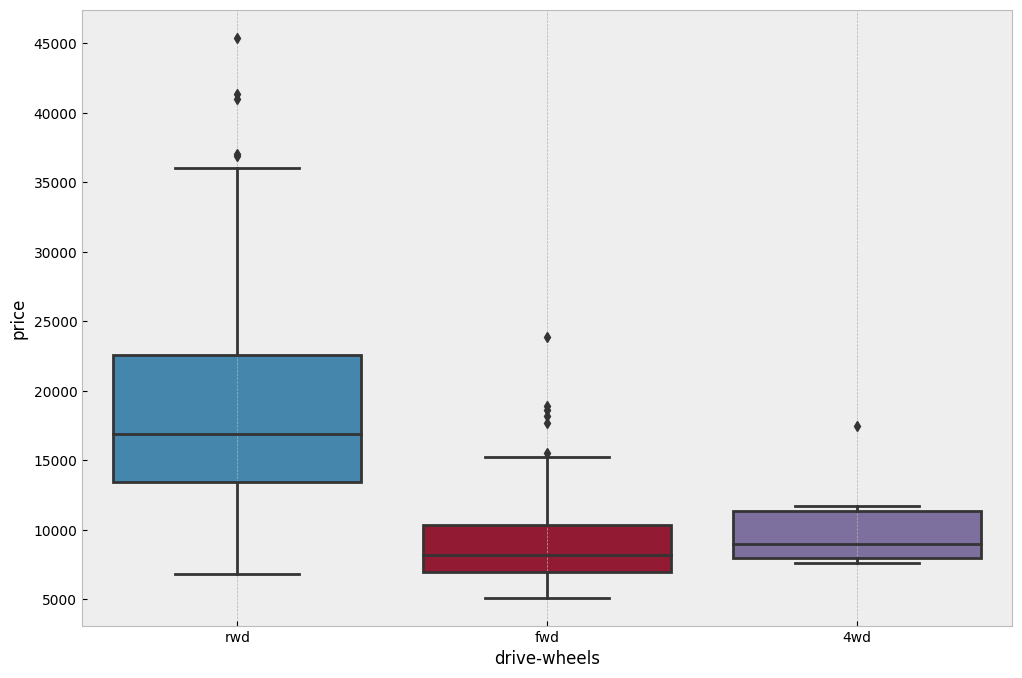

In [8]:
# To display the `Wheels types` we can use 'Box plot' to check the comparison between each and their outliers.
plt.figure(figsize=(12,8))
plt.style.use('bmh')
sns.boxplot(x='drive-wheels', y='price', data=df[['drive-wheels', 'price']])
plt.grid()


We can also **visualize** relationship between variables using <span style='color: green'><b>Scatter Plot</span>:
- Each observation represented as a data point/example. (`engine-size` is continuous variable and `price` is continuous variable. We can use them to understand the relationship between the `engine-size` and the car `price`.
- **Scatter plot** shows the relationship between two variables.
    1. <u>Example.independent</u> variables on `x-axis`. (*variable that you're using to predit the outcome*) --> `engine-size`
    2. <u>Target/dependent</u> variable on `y-axis`. (*variable that you're trying to predict*) --> `price`

Text(0, 0.5, 'Price')

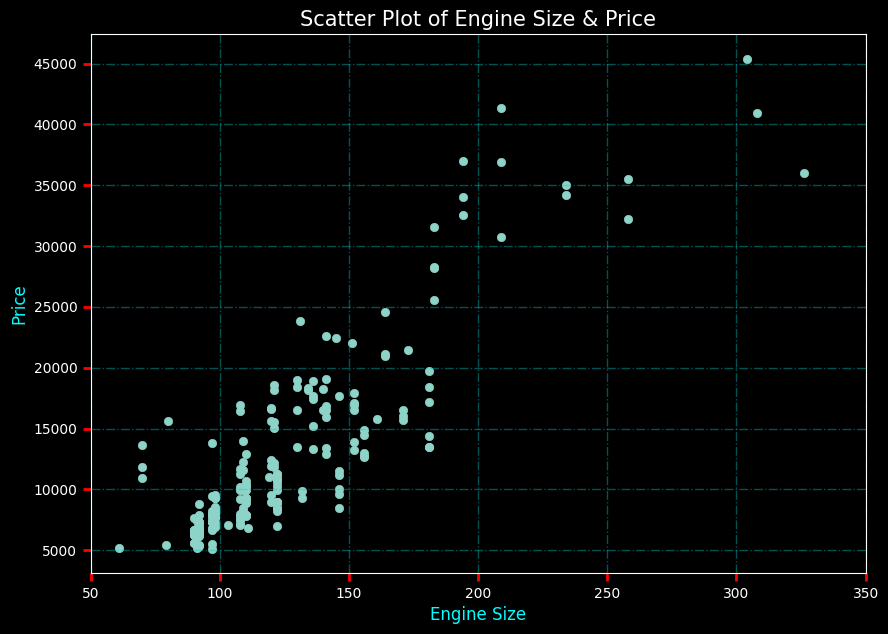

In [10]:
#Change the background of the plot
plt.style.use('dark_background')
# matplotlib.rcParams['figure.figsize'] = [width, height]
# plt.rcParams['figure.figsize'] = [10, 7]
plt.figure(figsize=(10,7))

x = df['engine-size']
y = df['price']

plt.scatter(x, y)

plt.xlim(50, 350)
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor='w', colors='r', grid_color='gray', grid_alpha=0.5)
plt.grid( which='major',color='DarkTurquoise', linestyle='-.', linewidth=1, alpha=0.4) # Grid shows the inline in the plot

# plt.minorticks_on()
plt.title('Scatter Plot of Engine Size & Price', fontsize=15, color='white')
plt.xlabel('Engine Size', fontsize=12, color='cyan')
plt.ylabel('Price', fontsize=12, color='cyan')

From The **Scatter Plot** you can see the there's <u>Positive Linear Relationship</u> between **engine-size** and **price**.
> When the <u>size of the engine</u> goes up, the <u>price</u> also increases.

---

### (B) Basic of Grouping (GroupBy) in Python
---

Use pandas `dataframe.groupby()` method:
- Can be applied on categrical variables.
- Group data into categories.
- Single or multiple variables.

In [23]:
# we're going to group 3 columns to check if the (body-style-drive-wheels) can effect on the price of the car using `.groupby()
df_test =df[['body-style', 'drive-wheels', 'price']]
df_grp = df_test.groupby(['body-style', 'drive-wheels'], as_index=False).mean()
df_grp

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


The data looks complex, we can using **Pivot method** to display the columns as:
- One Variable displayed along the <u>columns</u>.
- Other Variable displayed along the <u>rows</u>.

In [22]:
df_pivot = pd.pivot_table(df, index='drive-wheels', columns='body-style', values='price', aggfunc='count')
df_pivot.replace(np.nan, 0, inplace=True)
df_pivot.info()
df_pivot

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 4wd to rwd
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   convertible  3 non-null      float64
 1   hardtop      3 non-null      float64
 2   hatchback    3 non-null      float64
 3   sedan        3 non-null      float64
 4   wagon        3 non-null      float64
dtypes: float64(5)
memory usage: 144.0+ bytes


body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.0,0.0,1.0,3.0,4.0
fwd,1.0,1.0,49.0,55.0,12.0
rwd,5.0,7.0,18.0,36.0,9.0


In [25]:
df_grp = df_test.groupby(['body-style', 'drive-wheels'], as_index=False).mean()
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot.replace(np.nan, 0, inplace=True)
df_pivot.info()
df_pivot

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 4wd to rwd
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (price, convertible)  3 non-null      float64
 1   (price, hardtop)      3 non-null      float64
 2   (price, hatchback)    3 non-null      float64
 3   (price, sedan)        3 non-null      float64
 4   (price, wagon)        3 non-null      float64
dtypes: float64(5)
memory usage: 144.0+ bytes


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

We can also **visualize** relationship between variables using <span style='color: green'><b>Heatmap</span>:
- By using **Heatmap** you can visualize the variables using *color intensity* based on the data value at the grid points.
- It's a great way to plot the target variable over multiple variables, and throw this get visual clue of relationship between the `example` and `target`.

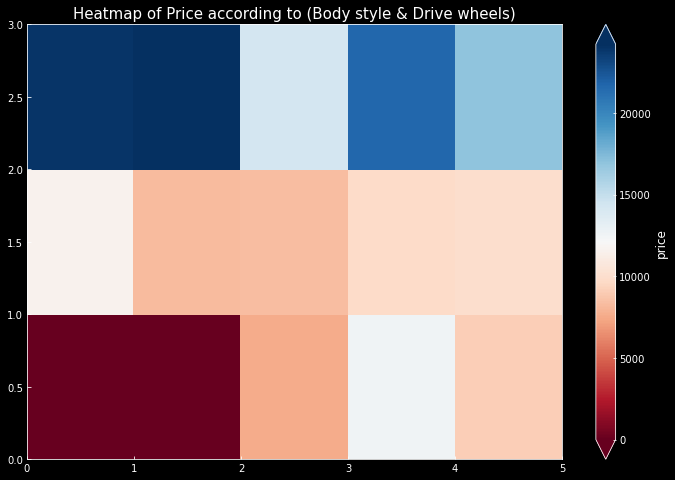

In [ ]:
plt.figure(figsize=(12, 8))
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar(label='price', extend='both')
plt.title('Heatmap of Price according to (Body style & Drive wheels)', fontsize=15, color='white')
plt.show()

### (C) Correlation in Python
---

***What is correlation?***
- Measures to what extent different variables are interdependent.
>> More easier, If we've 2 variables, if one variable change, how can this effect the other variable?

+ **Example:**
     - lang cancer -> Smoking
     - Rain -> Umbrella
+ Correlation doesn't imply causation.
    - In fact, we can say that Umbrella and rain are correlated  but we wouldn't have enougth info. to say if Umbrella caused the rain or rain caused umbrella.

##### (2) Correlation - Positive Linear Relationship
We can check the `correlation` between two features (*engine-size*, *price*).
- The main goal is to see whether the <u>*engine-size*</u> has an impact on the <u>*price*</u>.

(0.0, 53430.26769048745)

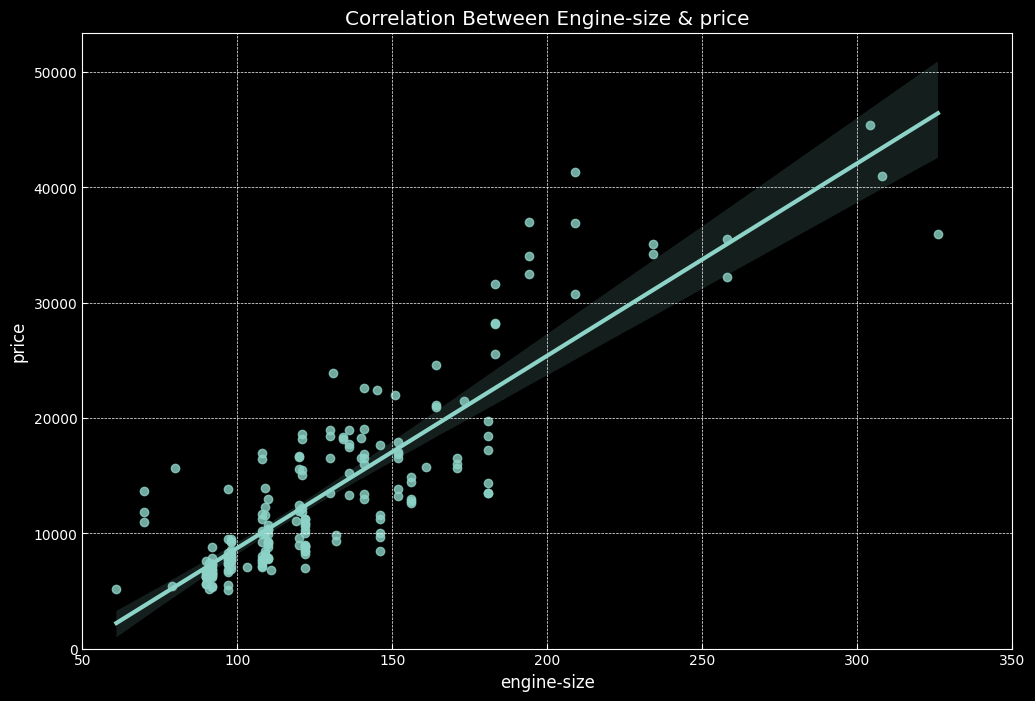

In [26]:
# we're using Seaborn library to visualize the data on regression plot
plt.figure(figsize=(12, 8))
sns.regplot(x='engine-size', y='price', data=df)
plt.title('Correlation Between Engine-size & price')
plt.xlim(50,350)
plt.ylim(0,)

From **visualize** relationship between (`engine-size`, `price`) using <span style='color: green'><b>Regression Plot</span>:
- We can see that, When the <u>engine-size</u> value increase, the <u>price</u> also increase. (**Positive Linear Correlation**)

##### (2) Correlation - Negitive Linear Relationship
We can check the **correlation** between two features (*highway-mpg*, *price*).
- The main goal is to see whether the <u>*highway-mpg*</u> has an impact on the <u>*price*</u>.

(0.0, 50000.0)

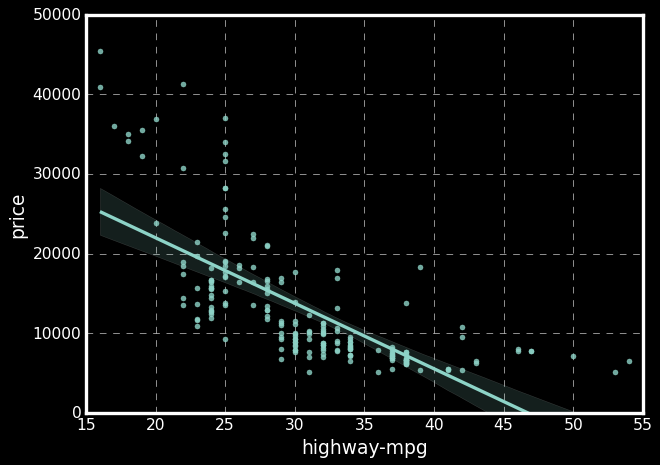

In [ ]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

From **visualize** relationship between (`highway-mpg`, `price`) using <span style='color: green'><b>Regression Plot</span>:
- We can see that, When the <u>highway-mpg</u> value increase, the <u>price</u> decrease. (**Negitive Linear Correlation**)

##### (3) Weak Correlation - Negitive Linear Relationship
We can check the `correlation` between two features (*peak-rpm*, *price*).
- The main goal is to see whether the <u>*peak-rpm*</u> has an impact on the <u>*price*</u>.

(0.0, 50000.0)

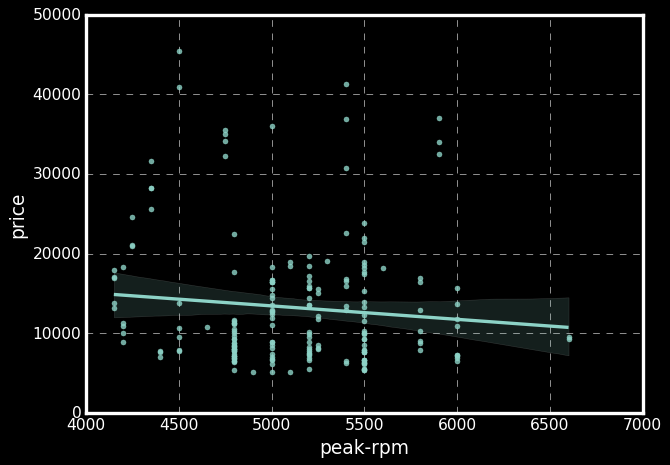

In [ ]:
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

From **visualize** relationship between (`peak-rpm`, `price`) using <span style='color: green'><b>Regression Plot</span>:
- In this example there're **Low** `peak-rpm` values, and **high** `peak-rpm` values.
- Using `peak-rpm` as a _predictor_ will not be a good sign to predict the target `price` (**Weak Linear Correlation**)

### (D) Correlation - Statistics
---
***Measure the strength of the correlation between two features.***
- Correlation coefficient.
- P-value.

<details><summary style='font-size:18px'>Correlation coefficient:</summary>

- **close to +1**: Large Positive relationship.
- **close to -1**: Large Negative relationship.
- **close to 0**: No relationship.

</details>

<details><summary style='font-size:18px'>P-value:</summary>

- P-value < 0.001 : **Strong** certainty in the result.
- 0.001 < P-value < 0.05 : **Moderate** certainty in the result.
- 0.05 < P-value < 0.1 : **Weak** certainty in the result.
- 0.1 < P-value > 0.1 : **No** certainty in the result.

</details>
<br>

<u>**Strong Correlation**</u>:
+ Correlation coefficient close to 1 or -1.
+ P-value less than 0.001.

<center>
<img src="modules_images/Pearson_Correlation.png", style='width: 1020px;height: 500px;'>
</center>

In [28]:
df.corr()

<ipython-input-28-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


Now, lets check the **Pearson Correlation** between `horsepower` and `price`:

In [ ]:
df['horsepower'].dtype # dtype('float64')
df['horsepower'].to_frame().isnull().value_counts() # First, check if there any null values to change.
max_value = df['horsepower'].idxmax() # The null values is so small, so we can change it with the max value in the variable
df['horsepower'].replace(np.nan, max_value, inplace=True)

In [ ]:
import scipy.stats as stats

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f'Pearson Correlation: {pearson_coef}')
print(f'P-value: {p_value}')

Pearson Correlation: 0.8096068016571054
P-value: 6.273536270650504e-48


In [ ]:
print(p_value < 0.001)

True


From the results, we can see that:
- Pearson coefficient between 1 and -1 --> (~0.81)
- P-value < 0.001

Which mean `horsepower` and `price` has **Strong Positive Correlation**
We can also use <span style='color: green'><b>Heatmap</span> to check the correlation of all the dataframe, we will see that almost all o them = 1.

### (E) Analysis of Variance (ANOVA)
---
- Statistical comparison of groups.
- **Example**: average price of different vehicle makes ---> in `make` variable in **Car Dataset**

###### The Question that may answer you question, How *categorical variable* has impact on the `price`?

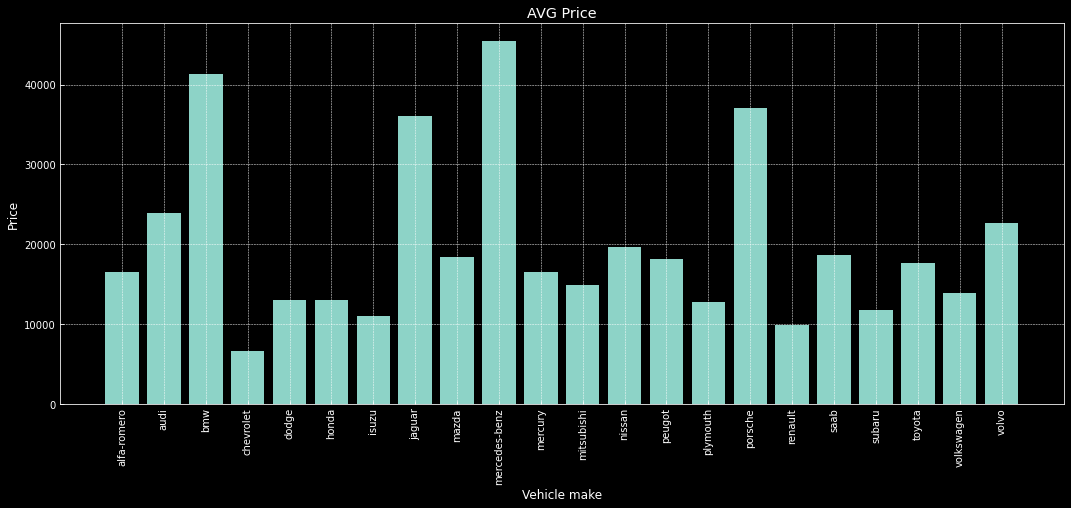

In [ ]:
# let's make a statistical comparison between the variable groups.
# plt.figure(figsize=(21,8))
plt.title('AVG Price')
plt.xlabel('Vehicle make')
plt.ylabel('Price')
plt.bar('make','price', data=df)
plt.rcParams['figure.figsize'] = [21,7]
plt.xticks(rotation=90)
plt.show()

#### ANOVA
- <u>AN</u>**alysis** <u>O</u>**f** <u>VA</u>**riance** (ANOVA)
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>
##### Why do we perform ANOVA?
- Finding correlation between different groups of a `categorical variables`.

##### What we otain from ANOVA?
- **F-test** score: $\frac{\text{variation Between Sample Group Means}} {\text{Variation Within Sample Group}}$
<div style='width: 275px;'>
    <img src='modules_images/ANOVA_F_test.png'>
</div>
- **p-value**: confidence degree


##### ANOVA- F-test
<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

1. **Small F-test** imply <u>poor</u> correlation between variable categories and target variable.

> *Assuming that the first group is `Hunda` and the second group is `subaru`*.
<center>
    <img src='modules_images/weak_f_test.png',  style='width: 500px;'>
</center>

2. **Large F-test** imply <u>strong</u> correlation between variable categories and target variable.

>*Assuming that the first group is `Jaguar` and the second group is `Hunda`*.
<center>
    <img src='modules_images/strong_f_test.png',  style='width: 500px;'>
</center>

So, to get the exact variances, we need to perform **ANOVA** test to check if our intuition is correct.

In [29]:
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])
print(grouped_anova.get_group('jaguar')['price'])

44    32250.0
45    35550.0
46    36000.0
Name: price, dtype: float64


In [30]:
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])

###--- ANOVA between "Honda" and "Subaru" ---###
anova_results_1 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
print(f'ANOVA results (1): F-test= {anova_results_1[0]}, p= {anova_results_1}, p-value= {anova_results_1[1]}')

###--- ANOVA between "Honda" and "Jaguar" ---###
anova_results_2 = stats.f_oneway(grouped_anova.get_group('jaguar')['price'], grouped_anova.get_group('honda')['price'])
print(f'ANOVA results (2): F-test= {anova_results_2[0]}, p= {anova_results_2}, p-value= {anova_results_2[1]}')

ANOVA results (1): F-test= 0.19744030127462606, p= F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193), p-value= 0.6609478240622193
ANOVA results (2): F-test= 400.925870564337, p= F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11), p-value= 1.0586193512077862e-11


If you notice, you can see the difference between the **F-test** and **p-value** in both equation.